In [60]:
# https://scientific-python.readthedocs.io/en/latest/notebooks_rst/3_Ordinary_Differential_Equations/02_Examples/Lotka_Volterra_model.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
#import ipywidgets as ipw

In [61]:
alpha = 1.  # reproduction rate for preys
beta = 1.   # mortality rate due to predators
delta = 1.  # mortality rate of predators
gamma = 1.  # reproduction rate for predators
x0 = 4.     # initial population of preys
y0 = 2.     # initial population of predators

def derivative(X, t, alpha, beta, delta, gamma):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-delta + gamma * x)
    return np.array([dotx, doty])

In [62]:
Nt = 1000
tmax = 30.
t = np.linspace(0.,tmax, Nt)
X0 = [x0, y0]
res = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
x, y = res.T

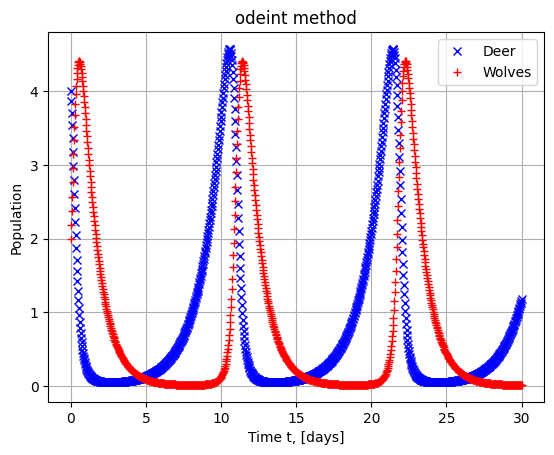

In [63]:
#plt.figure()
plt.grid()
plt.title("odeint method")
plt.plot(t, x, 'xb', label = 'Deer')
plt.plot(t, y, '+r', label = "Wolves")
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show()

In [64]:
import random
import matplotlib.cm as cm

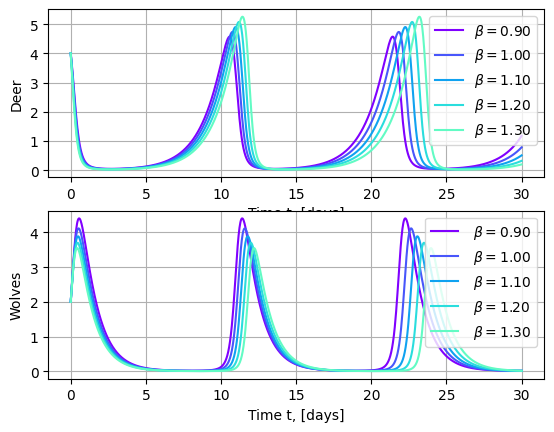

In [65]:
betas = np.arange(0.9, 1.4, 0.1)

nums=np.random.random((10,len(betas)))
colors = cm.rainbow(np.linspace(0, 1, nums.shape[0]))  # generate the colors for each data set

fig, ax = plt.subplots(2,1)

for beta, i in zip(betas, range(len(betas))):
    res = integrate.odeint(derivative, X0, t, args = (alpha,beta, delta, gamma))
    ax[0].plot(t, res[:,0], color = colors[i],  linestyle = '-', label = r"$\beta = $" + "{0:.2f}".format(beta))
    ax[1].plot(t, res[:,1], color = colors[i], linestyle = '-', label = r" $\beta = $" + "{0:.2f}".format(beta))
    ax[0].legend()
    ax[1].legend()

ax[0].grid()
ax[1].grid()
ax[0].set_xlabel('Time t, [days]')
ax[0].set_ylabel('Deer')
ax[1].set_xlabel('Time t, [days]')
ax[1].set_ylabel('Wolves');

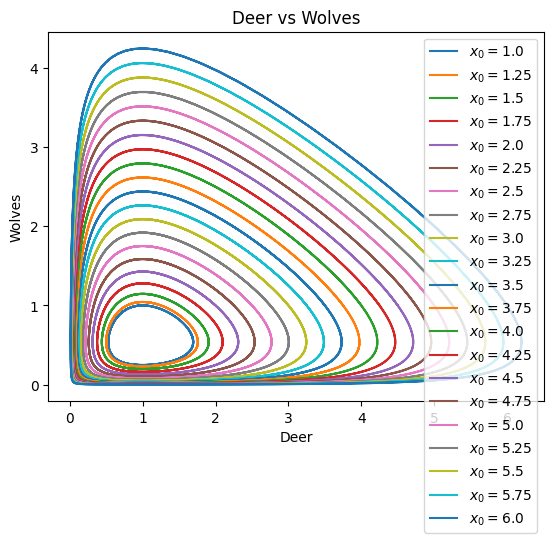

In [66]:
plt.figure()
IC = np.linspace(1.0, 6.0, 21) # initial conditions for deer population (prey)
for deer in IC:
    X0 = [deer, 1.0]
    Xs = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
    plt.plot(Xs[:,0], Xs[:,1], "-", label = "$x_0 =$"+str(X0[0]))
plt.xlabel("Deer")
plt.ylabel("Wolves")
plt.legend()
plt.title("Deer vs Wolves");

In [67]:
1/alpha

1.4285714285714286

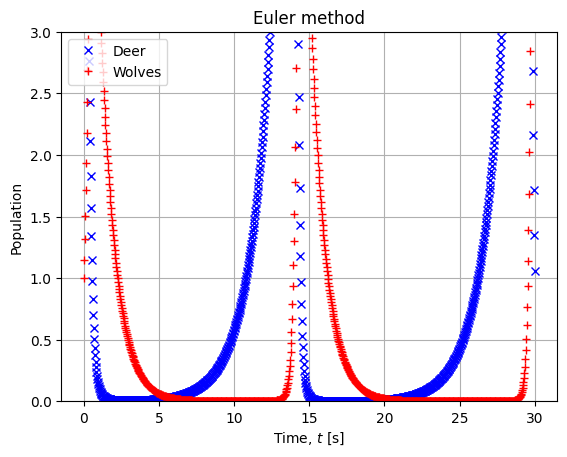

In [68]:
# Solving with explicit Euler method

def Euler(func, X0, t, alpha, beta, delta, gamma):
    """
    Euler solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1):
        X[i+1] = X[i] + func(X[i], t[i], alpha,  beta, delta, gamma) * dt
    return X
Xe = Euler(derivative, X0, t, alpha, beta, delta, gamma)
plt.figure()
plt.title("Euler method")
plt.plot(t, Xe[:, 0], 'xb', label = 'Deer')
plt.plot(t, Xe[:, 1], '+r', label = "Wolves")
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel('Population')
plt.ylim([0.,3.])
plt.legend(loc = "best")

plt.show()

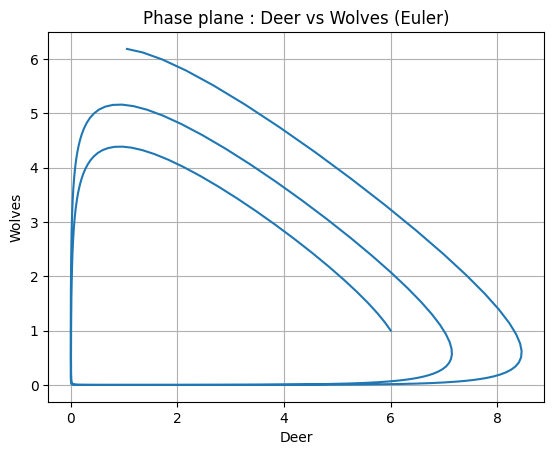

In [69]:
plt.figure()
plt.plot(Xe[:, 0], Xe[:, 1], "-")
plt.xlabel("Deer")
plt.ylabel("Wolves")
plt.grid()
plt.title("Phase plane : Deer vs Wolves (Euler)");

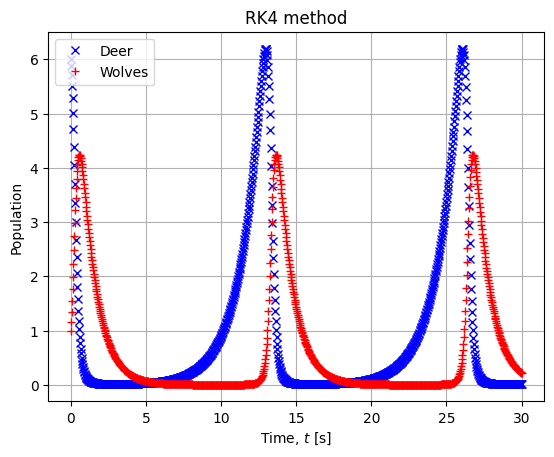

In [70]:
# With RK4
def RK4(func, X0, t, alpha,  beta, delta, gamma):
    """
    Runge Kutta 4 solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1):
        k1 = func(X[i], t[i], alpha,  beta, delta, gamma)
        k2 = func(X[i] + dt/2. * k1, t[i] + dt/2., alpha,  beta, delta, gamma)
        k3 = func(X[i] + dt/2. * k2, t[i] + dt/2., alpha,  beta, delta, gamma)
        k4 = func(X[i] + dt    * k3, t[i] + dt, alpha,  beta, delta, gamma)
        X[i+1] = X[i] + dt / 6. * (k1 + 2. * k2 + 2. * k3 + k4)
    return X
Xrk4 = RK4(derivative, X0, t, alpha,  beta, delta, gamma)
plt.figure()
plt.title("RK4 method")
plt.plot(t, Xrk4[:, 0], 'xb', label = 'Deer')
plt.plot(t, Xrk4[:, 1], '+r', label = "Wolves")
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel('Population')
plt.legend(loc = "best")

plt.show();

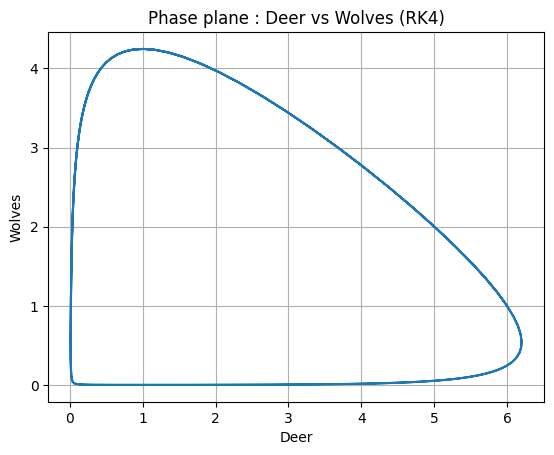

In [71]:
plt.figure()
plt.plot(Xrk4[:, 0], Xrk4[:, 1], "-")
plt.xlabel("Deer")
plt.ylabel("Wolves")
plt.grid()
plt.title("Phase plane : Deer vs Wolves (RK4)");